# Stroop Effect EDA

### Project Notes: 
##### Summary
This jupyter notebook is my submission for the P1 section of the Data Analyst nanodegree's 'Statistics: The Science of Decisions' project. Here I will conduct some exploratory data analysis in order to better help me answer the questions for investigation listed in the project instructions. 

##### About the Stroop Effect Test
As descibed in the Instuctions section for this Udacity project, the experiement demonstrating the Stroop Effect is as follows:

![image](supporting-files/stroop-summary.png)

Additionally, the [University of Washington's Stroop Effect online test](https://faculty.washington.edu/chudler/java/ready.html) was linked to in the P1 project description as a way to try the test out. This may be intereesting to investigate as well.

### Exploratory Data Analysis:

##### Load and Visualize the Data

In [74]:
import pandas as pd

A set of 24 participants' recorded times for the Congruent and Incongruent tasks were provided by Udacity in the instructions for this project. The first five rows are below.

In [75]:
stroop = pd.read_csv('supporting-files/stroopdata.csv')
stroop.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


Here, the same 24 records are plotted as histograms for the Congruent and Incongruent tasks.

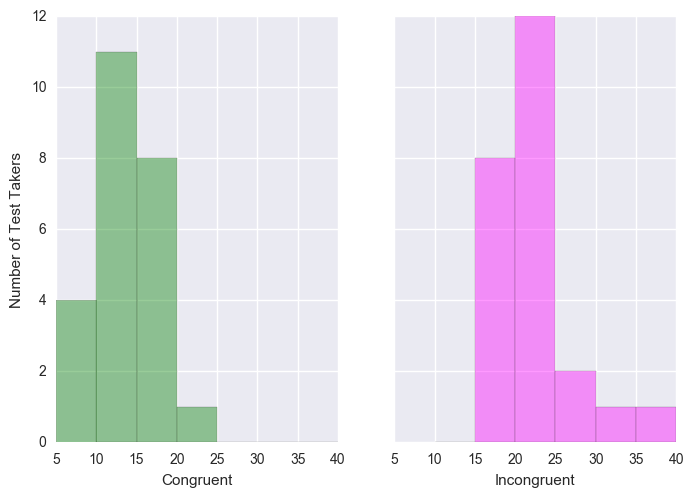

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

cong = stroop['Congruent']
incong = stroop['Incongruent']

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)

sns.distplot(cong, bins=range(5,45,5), color='green', ax=ax1, kde=False)
ax1.set_ylabel("Number of Test Takers")

sns.distplot(incong, bins=range(5,45,5), color='magenta', ax=ax2, kde=False)


plt.show()

Clearly the Incongruent task is taking longer to complete for most participants. *This may lead to an interesting test of hypothesis to see whether or not the mean time to complete the Incongruent set is significantly longer than that of the Congruent set.*

Aside from the data set of 24 participants provided in the project instructions, another set can be uncovered in [the University of Washington's online Stroop test](https://faculty.washington.edu/chudler/java/ready.html). After taking the test, a page is displayed where one can enter one's results from both the Congruent and Incongruent tasks. After doing so a grouped breakdown of all participants' performance up until that point is revealed. When I completed the test I was the 204,083rd person to record a time. I captured the values manually and added them to the below dataframe. The intervals in this grouped data represent the **increase** in time taken to complete the test between the Congruent and Incongruent tasks. Here 'Total' represents the total number of people to have recorded their times.

interval = ['0-5 sec','5-10 sec','10-15 sec','15-20 sec','20-25 sec','25-30 sec','30-35 sec','35-40 sec','More than 40 sec']
grouped_values = [40098,52420,48947,23050,11958,4927,3047,1930,3897]
midpoint = [2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5]

uw_grouped_data = pd.DataFrame({'Interval':interval,
                               'Midpoint':midpoint,
                               'Total':grouped_values})
uw_grouped_data

Two important notes about the University of Washington data:

First, a small percentage of people not shown here (approximately 6%) claimed that the Incongruent word set took them **less** time to complete than the Congruent set. While this may have been true for some, I'll maintain here that this can be disregarded given the fact that the data is compiled from manual user-input (people selecting a radio button to note their times and submitting the result, this instead of the website somehow calculating this for them). People may be just clicking through, or  selecting one of the first times they can in order to get to the summary page to see the full summary of all participants' times. This calls into question the accuracy of the data as a whole but, really, there's no other choice but to assume the rest of the data is not significantly inaccurate.

Second, slightly less than 2% of participants took more than 40 seconds longer to complete the Incongruent set compared to the Congruent. Given this is a small percentage and mostly follows the somewhat normally distributed nature of the data I'll group all of the times lasting more than 40 seconds in a bin between 40 and 45 seconds.

Moving on, it seems reasonable to group the Udacity-provided data set into 5-second units, similar to the University of Washington's grouped data of 204,083 participants. The following histograms show both sets grouped in this way. Note the scale difference on the y-axis:

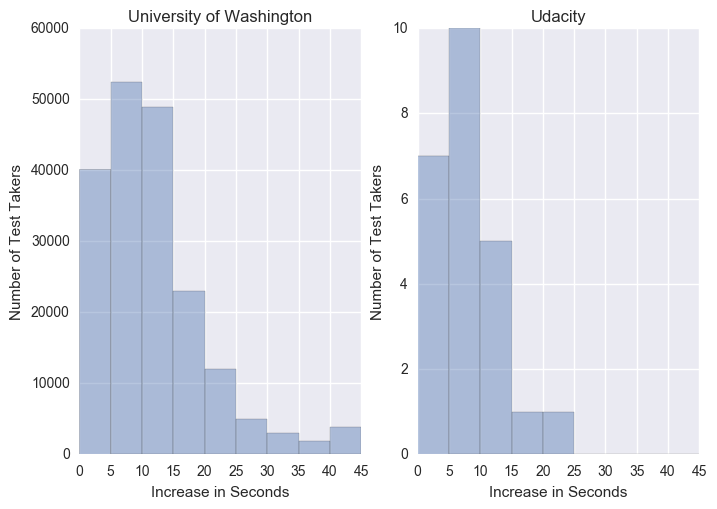

In [77]:
for row in stroop:
    stroop['Difference'] = abs(stroop['Congruent'] - stroop['Incongruent'])
    
# plot the grouped differences in time for both the University of Washington data and the Udacity data
fig, (ax1,ax2) = plt.subplots(ncols=2, sharey = False)

sns.distplot(midpoint, hist_kws={'weights':uw_grouped_data['Total']}, bins=range(0,50,5), ax=ax1, kde=False)
ax1.set_xlabel("Increase in Seconds")
ax1.set_ylabel("Number of Test Takers")
ax1.set_title("University of Washington")

sns.distplot(stroop['Difference'], bins=range(0,50,5), ax=ax2, kde=False)
ax2.set_xlabel("Increase in Seconds")
ax2.set_ylabel("Number of Test Takers")
ax2.set_title("Udacity")

plt.show()

The distributions look similar, but to what is their respective mean and standard deviation?

##### Compute Some Statistics

In [78]:
import statistics as stats
udacity_mean = stats.stdev(stroop['Difference'])
print('The Udacity data set mean is: %s' % round(udacity_mean,2))

The Udacity data set mean is: 4.86


In [79]:
udacity_stdv = stats.mean(stroop['Difference'])
print('The Udacity data set is: %s' % round(udacity_stdv,2))

The Udacity data set is: 7.96


In [80]:
# prepare UW grouped data frame for computing mean and standard deviation
for row in uw_grouped_data:
    uw_grouped_data['xj*f'] = uw_grouped_data['Midpoint'] * uw_grouped_data['Total']
    uw_grouped_data['xj^2*f'] = uw_grouped_data['Midpoint']**2 * uw_grouped_data['Total']
uw_grouped_data

,Interval,Midpoint,Total,xj*f,xj^2*f
0,0-5 sec,2.5,40098,100245.0,250612.50
1,5-10 sec,7.5,52420,393150.0,2948625.00
2,10-15 sec,12.5,48947,611837.5,7647968.75
3,15-20 sec,17.5,23050,403375.0,7059062.50
4,20-25 sec,22.5,11958,269055.0,6053737.50
5,25-30 sec,27.5,4927,135492.5,3726043.75
6,30-35 sec,32.5,3047,99027.5,3218393.75
7,35-40 sec,37.5,1930,72375.0,2714062.50
8,More than 40 sec,42.5,3897,165622.5,7038956.25


In [81]:
import math as math
uw_mean = uw_grouped_data['xj*f'].sum() / uw_grouped_data['Total'].sum()
print('The UW data set mean is: %s' % round(uw_mean,2))

uw_stdv = math.sqrt((uw_grouped_data['xj^2*f'].sum() / uw_grouped_data['Total'].sum()) - uw_mean**2) 
print('The UW data set standard deviation is: %s' % round(uw_stdv,2))

The UW data set mean is: 11.83
The UW data set standard deviation is: 8.59


Finally, we see some statistics for both the Udacity set and the University of Washington's set of time in second difference between the Congruent and Incongruent Stroop Effect test (all are approximate). 

Udacity:
* Mean, 4.86
* Standard deviation, 7.96

University of Washington:
* Mean, 11.83
* Standard deviation, 7.96

##### Concluding the Exploratory Data Analysis
Two questions that arise from these data:

1. Looking only at the Udacity data set, is the mean time to complete the Incongruent set of the Stroop Effect test significantly more than the mean of the Congruent set? It appears to be but a one-tailed hypothesis test may reveal whether or not this is true.

2. Comparing the grouped data from University of Washington's Stroop Effect test to the Udacity set, is the mean difference in time between Congruent and Incongruent conditions significantly less in the Udacity set? Again, it appears to be but conducting a one-tailed hypothesis test may reveal if this is the case.

### Hypothesis Test - Udacity Congruent vs. Incongruent

One useful hypothesis test would be to compare the mean time to complete the Congruent task to the Incongruent task for the Udacity data set. Some importan parameters that influence the nature of the hypothesis test:
* The sample size, n, is 24, which is less than 30 and warrants using a t-distribution.
* The population and standard deviation are unknown which creates the need to use an unbiased estimator for standard deviation when conducting the hypothesis test.


##### Setting Up the Test Of Significance

Within the Udacity data set, is the mean time to complete the Incongruent task significantly longer than that of the Congruent task?

In [87]:
# compute the mean for both Congruent and Incongruent tasks
udacity_cong_mean = stats.mean(stroop['Congruent'])
udacity_incong_mean = stats.mean(stroop['Incongruent'])

print("Congruent task mean: %s" % round(udacity_cong_mean,4))
print("Incongruent task mean: %s" % round(udacity_incong_mean,4))

Congruent task mean: 14.0511
Incongruent task mean: 22.0159


The Incongruent task mean is definitely larger. The below dataframe isolates the Incongruent task column to assist in calculating the unbiased estimator for standard deviation:

In [88]:
udacity_incong = pd.DataFrame(stroop['Incongruent'])

for row in udacity_cong:
    udacity_incong['(xi-xb)^2'] = (udacity_incong['Incongruent'] - udacity_incong_mean)**2

udacity_incong.head()

,Incongruent,(xi-xb)^2
0,19.278,7.496188
1,18.741,10.725079
2,21.214,0.643070
3,15.687,40.055186
4,22.803,0.619500


In [89]:
# compute the unbiasted estimator for stanard deviation of Incongruent set
udacity_incong_ubstdv = math.sqrt(udacity_incong['(xi-xb)^2'].sum() / (udacity_incong['Incongruent'].count() - 1))
print("The unbiased estimator for standard deviation: %s" % round(udacity_incong_ubstdv,4))

The unbiased estimator for standard deviation: 4.7971


The following hypothesis test will examine whether or not the mean of the Incongruent task is significantly more than that of the Congruent task. The important parameters (estimates) for the hypothesis test are:

*Incongruent set*
* Sample size: 24
* Incongruent task mean: 22.0159
* Unbiased estimator for standard deviation: 4.7971

*Congruent set*
* Congruent task mean: 14.0511

In [114]:
from IPython.display import display, Math, Latex

In [124]:
display(Math(r'\alpha = 0.05'))

<IPython.core.display.Math object>

In [115]:
display(Math(r'H_0:\mu = 14.0511'))

<IPython.core.display.Math object>

vs.

In [117]:

display(Math(r'H_1:\mu > 14.0511'))

<IPython.core.display.Math object>

$e^{i\pi} + 1 = 0$

$$\sum_{i=0}^n i^2 = \frac{(n^2+n)(2n+1)}{6}$$ and words around the formula